# Exercise: NEISS, Question Set F

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- String replacement using regular expressions
- Using codebooks

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd

In [77]:
df_neiss = pd.read_csv('nss15.tsv', sep='\t', error_bad_lines=False)

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


### Check that your dataframe has 357727 rows and 19 columns.

In [3]:
df_neiss.shape

(357727, 19)

### List the columns and their data types

In [4]:
df_neiss.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [ ]:
# According to the coding manual:
# trmt_date: Code the date on which the patient was seen for treatment. Use two digits each for the month and day and four digits for the year, in that order. Whenever the month or day is 1 digit (1-9), add a zero in front of the number, i.e., 1 becomes 01, 2 becomes 02, etc.
# body_part: Use the codes in the table which follows for the body part affected in the product related incident. Also see Appendix C. The body part diagram in Appendix D will help you visualize more clearly the boundaries of such parts as lower trunk, upper arm, etc.
# narr1: Every case MUST include descriptive comments or remarks. Enter these notes on the two lines labeled "Comment" that immediately follow the coded entries. Be sure to include the body part and diagnosis from the ED chart, as well as the patient’s age and gender in the comment.
# diag: The diagnosis codes are listed in the table which follows. Use the attending physician's diagnosis to determine the nature of an injury. If the attending physician's diagnosis is missing, use diagnostic information provided by a medical professional to select the appropriate code. If the record contains no diagnosis by medical personnel, review the patient's complaint and the treatment given to arrive at the most logical diagnosis.

# Cleaning up a column

Take a look at the **race** column. How many rows of each race are there?

In [6]:
df_neiss['race'].value_counts()

1    145813
0    138666
2     48868
3     18884
4      4130
5      1000
6       366
Name: race, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 28 of the column definitions file.

In [78]:
races = {
    1: 'White',
    2: 'Black/African American',
    4: 'Asian',
    5: 'American Indian/Alaska Native',
    6: 'Native Hawaiian/Pacific Islander',
    3: 'Other',
    0: 'Not Stated in ED record'
}

In [79]:
df_neiss.race.replace(races, inplace=True)

In [80]:
df_neiss.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,Not Stated in ED record,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,White,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,Not Stated in ED record,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,Not Stated in ED record,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,Other,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Confirm you have 145813 White, 138666 not stated, and 48868 Black.

In [24]:
df_neiss.race.value_counts()

White                               145813
Not Stated in ED record             138666
Black/African American               48868
Other                                18884
Asian                                 4130
American Indian/Alaska Native         1000
Native Hawaiian/Pacific Islander       366
Name: race, dtype: int64

## Graph the number of each race, but don’t included the “Not Stated” records

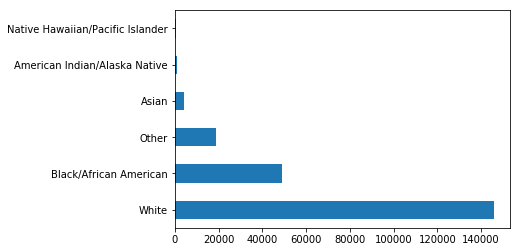

In [25]:
%matplotlib inline
df_neiss[df_neiss.race != 'Not Stated in ED record']['race'].value_counts().plot(kind='barh')

## "Not Stated" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [81]:
import numpy as np
df_neiss['race'].replace('Not Stated in ED record', np.nan, inplace=True)

In [30]:
df_neiss.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,NaN,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,White,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,NaN,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,NaN,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,Other,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Graph the count of each race, but don’t included the “Not Stated” records

Yes, again! The code you use should be different this time.

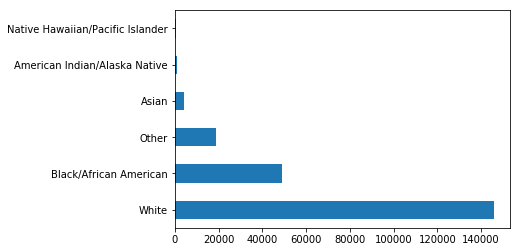

In [31]:
df_neiss['race'].value_counts().plot(kind='barh')

## Graph the top 10 most popular products for injuries 

In [33]:
df_neiss['prod1'].value_counts().nlargest(10)

1842    28609
1807    28255
4076    16707
1205    14095
5040    12737
1211    11614
4074     8239
1884     7755
1893     7689
4057     7327
Name: prod1, dtype: int64

# Cleaning up `race_other`

## `race_other` is a field for free-form race input. How many patients have a race of "HISPANIC"?

In [82]:
len(df_neiss[df_neiss['race_other'].str.contains('HISPANIC', na=False)])

14392

## What are the top 5 most popular "other" races?

In [83]:
df_neiss['race_other'].value_counts().nlargest(5)

HISPANIC        14389
MULTI-RACIAL     1727
UNKNOWN          1554
HISP             1334
NS                495
Name: race_other, dtype: int64

## Searching for multiracial patients

Wow, this data entry is terrible. “Multiracial” is spelled as **MULT RACIAL**, **MULTIPLE RACIAL**, and many more. How many different spellings can you find? **Use only one line to find the spellings.**

- Tip: Be sure to **ignore the na values**.
- Tip: You should probably find the multiracial-ish rows and then `value_counts` their `other_race`
- Tip: Maybe... ask me about .str.contains support for regular expressions?

In [93]:
list(df_neiss[df_neiss['race_other'].str.contains(r'^MULTI.*', na=False)]['race_other'].unique())

['MULTIRACIAL']

## Replace all of those spellings with “MULTIRACIAL.”

Confirm that you’ve ended up with about 1900 MULTIRACIAL rows (yours might be anywhere between 1899-1910, depending on how many spellings you caught)

In [88]:
df_neiss['race_other'].replace(r'^MULTI.*', 'MULTIRACIAL', inplace=True, regex=True)

In [89]:
len(df_neiss[df_neiss['race_other'] == 'MULTIRACIAL'])

1909

## Do the same thing with misspellings of "Unknown"

You should end up with around 1660-1670 UNKNOWN entries

In [90]:
df_neiss['race_other'].replace(r'^UN?KN.*', 'UNKNOWN', inplace=True, regex=True)

In [91]:
len(df_neiss[df_neiss['race_other'] == 'UNKNOWN'])

1677

## What variations on HISPANIC can you find? Standardize them to HISPANIC.

In [92]:
list(df_neiss[df_neiss['race_other'].str.contains(r'^HISP.*(ANIC)?', na=False)]['race_other'].unique())

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


['HISPANIC',
 'HISP',
 'HISPANI',
 'HISPAANIC',
 'HISPPANIC',
 'HISPAINC',
 'HISPNIC',
 'HISPANIE',
 'HISPNANIC',
 'HISPANIC S/P B',
 'HISPAINIC',
 'HISPANIC/LATINO']

In [94]:
df_neiss['race_other'].replace(r'^HISP.*(ANIC)?', 'HISPANIC', inplace=True, regex=True)

## Now try counting the number of hispanic people again.

In [95]:
len(df_neiss[df_neiss['race_other'] == 'HISPANIC'])

15735

## Seems like a lot! Update their race column to be ‘Hispanic’ instead of “Other”

You'll try to do this using skills you know, but pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [96]:
df_neiss.loc[df_neiss.race_other == 'HISPANIC', 'race'] = 'HISPANIC'

## Graph the frequency of each race in the dataset

In [97]:
df_neiss['race'].value_counts()

White                               145131
Black/African American               48848
HISPANIC                             15735
Asian                                 4124
Other                                 3936
American Indian/Alaska Native          998
Native Hawaiian/Pacific Islander       364
Name: race, dtype: int64

## Find every injury involving unicycles.

In [104]:
df_unicyles = df_neiss[(df_neiss['prod1'] == 1283) | (df_neiss['prod2'] == 1283)]
df_unicyles

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
4171,150744255,06/23/2015,8,5.6748,C,12,2,White,NaN,57,NaN,33,1,0,0,1283,NaN,12YOF FELL OFF A UNICYCLE; FOREARM FX.,NaN
46499,150502967,04/22/2015,41,15.0591,V,62,1,NaN,NaN,57,NaN,33,4,9,0,1283,NaN,62YOM RIDING A UNICYCLE AT THE PARK AND FELL. ...,NaN
51052,150337697,03/15/2015,67,15.0591,V,9,2,NaN,NaN,71,ARM PAIN,33,1,8,0,1283,NaN,DX PN RT ARM 9YOF PATIENT WITH RT ARM PN SHE H...,FELL OFF UNICYCLE AT SCHOOL NOW WITH ARM PAIN RT
119639,151223619,12/08/2015,51,74.8813,L,56,1,Black/African American,NaN,71,PAIN,35,6,0,0,1283,1807.0,56 YO M PT WAS TRYING TO TEACH A COUPLE OF KID...,FELL BACKWARDS ONTO FLOOR C/O LEFT KNEE PAIN W...
180961,150919495,08/18/2015,93,15.7762,V,52,1,White,NaN,53,NaN,79,1,4,0,1283,NaN,52 YOM WAS UNICYCLING DOWN STREET WHEN HE WAS ...,AT LOW SPEED. DX: COCCYGEAL CONT.


## What is the racial breakdown of people involved in unicycle accidents?

I want a **percentage**, and I want that percentage to include unknowns/NaN values.

In [110]:
df_unicyles['race'].value_counts(dropna=False, normalize=True)

White                     0.4
NaN                       0.4
Black/African American    0.2
Name: race, dtype: float64

In [114]:
# or
df_unicyles['race'].value_counts(dropna=False).apply(lambda x: str(round(x/len(df_unicyles) * 100)) + '%')

White                     40%
NaN                       40%
Black/African American    20%
Name: race, dtype: object

## How about injuries with toboggans?

Is the racial breakdown significantly different than the racial breakdown of all patients?

In [117]:
df_toboggans = df_neiss[(df_neiss['prod1'] == 1273) | (df_neiss['prod2'] == 1273)]
df_toboggans['race'].value_counts(dropna=False).apply(lambda x: str(round(x/len(df_toboggans) * 100)) + '%')

NaN         56%
White       33%
HISPANIC    11%
Name: race, dtype: object

## Find the top 5 most dangerous products

Just use the `prod1` column.

In [119]:
df_neiss['prod1'].value_counts().nlargest(5)

1842    28609
1807    28255
4076    16707
1205    14095
5040    12737
Name: prod1, dtype: int64

## Find the top 5 most dangerous products by race

This is that weird groupby thing that you can either memorize or cut and paste every time. If you ask I'll tell it to you and you won't have to search!

In [130]:
df_neiss.groupby('prod1')['race'].value_counts().groupby(level=1).nlargest(5)

race                              prod1  race                            
American Indian/Alaska Native     1807   American Indian/Alaska Native          92
                                  1842   American Indian/Alaska Native          70
                                  5040   American Indian/Alaska Native          58
                                  4076   American Indian/Alaska Native          52
                                  1205   American Indian/Alaska Native          31
Asian                             1842   Asian                                 310
                                  1807   Asian                                 253
                                  4076   Asian                                 219
                                  1205   Asian                                 203
                                  5040   Asian                                 198
Black/African American            1842   Black/African American               4377
             